In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.neural_net import TwoLayerNet
from __future__ import print_function
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    return np.max(np.abs(x-y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
input_size = 4   # 输入的维度D
hidden_size = 10   # 隐藏层
num_classes = 3   # 类别
num_inputs = 5  # 输入个数

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)  # 0-10之间(5,4) 5个4维的数
    y = np.array([0,1,2,2,1])   #5个数的类别（分三类）
    return X, y
net = init_toy_model()
X, y = init_toy_data()

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133
print('loss:%f, correct_loss:%f' % (loss, correct_loss))
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss))) # W1**2+W2**2都要加！

loss:1.303788, correct_loss:1.303788
Difference between your loss and correct loss:
3.67900292009e-07


In [7]:
from cs231n.gradient_check import eval_numerical_gradient
loss, grads = net.loss(X, y, reg=0.05)
for param_name in grads:
    f = lambda W : net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
#     print(param_grad_num)
#     print(grads[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 3.061768e-07
b1 max relative error: 1.311319e-06
W2 max relative error: 6.788005e-07
W1 max relative error: 1.907988e-05


Final training loss:  0.0171495062013


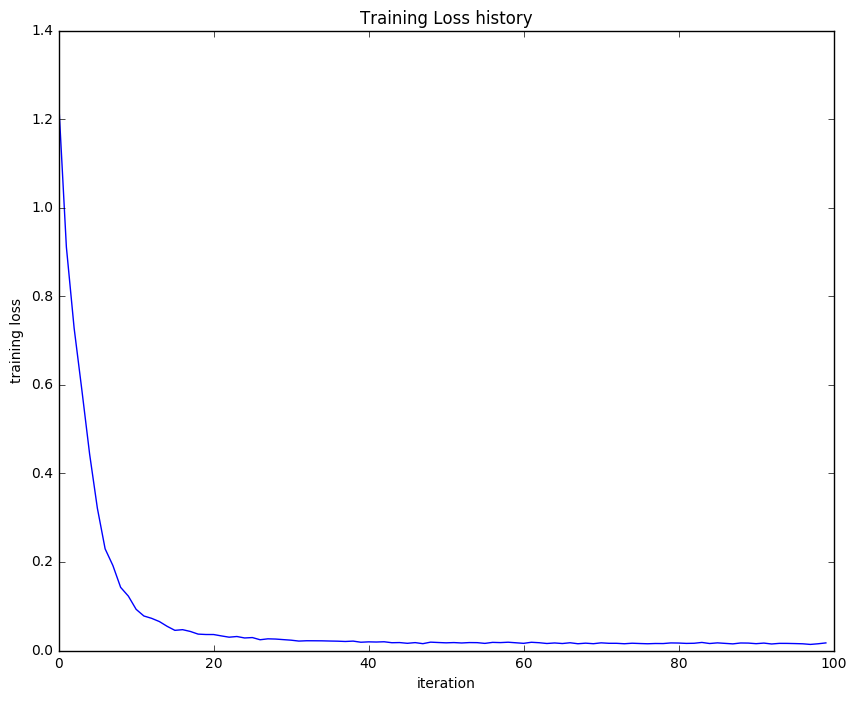

In [8]:
net = init_toy_model()
stats = net.train(X,y, X, y, learning_rate=1e-1, reg=5e-6, num_iters=100, verbose=False)
print('Final training loss: ', stats['loss_history'][-1])

plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [9]:
from cs231n.data_utils import load_CIFAR10
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test
    

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [11]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
                 num_iters=1000, batch_size=200,
                 learning_rate=1e-4, learning_rate_decay=0.95,
                 reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302953
iteration 100 / 1000: loss 2.302549
iteration 200 / 1000: loss 2.297647
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204169
iteration 500 / 1000: loss 2.118564
iteration 600 / 1000: loss 2.051534
iteration 700 / 1000: loss 1.988465
iteration 800 / 1000: loss 2.006590
iteration 900 / 1000: loss 1.951472
Validation accuracy:  0.287


[0.13500000000000001, 0.17499999999999999, 0.28499999999999998, 0.245, 0.32000000000000001]
[0.115, 0.189, 0.22500000000000001, 0.246, 0.28799999999999998]


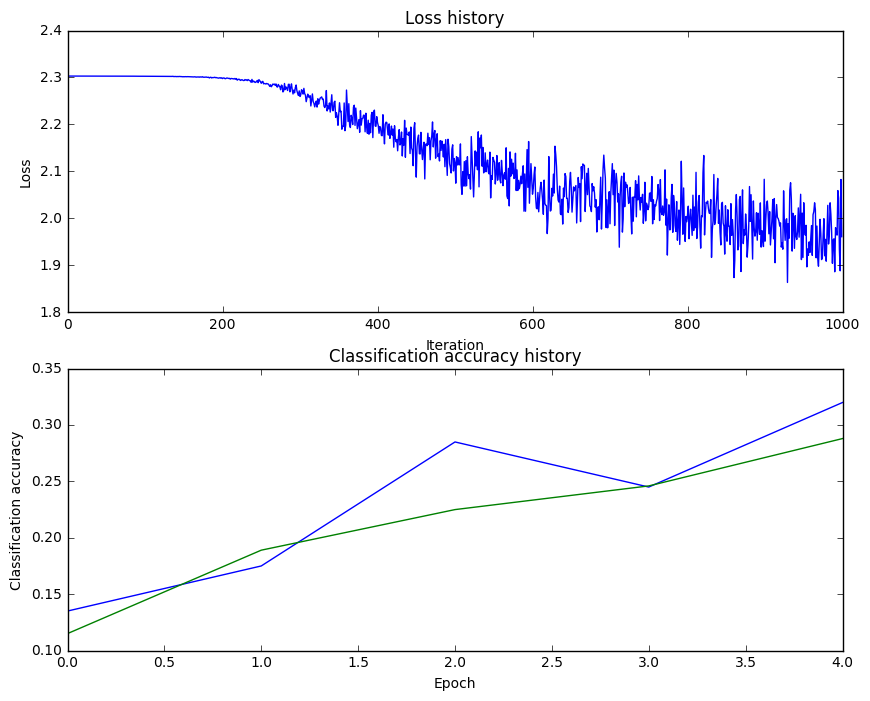

In [12]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
print(stats['train_acc_history'])
print(stats['val_acc_history'])
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

- the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low.
- no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size.(with a very large model we would expect to see more overfitting)

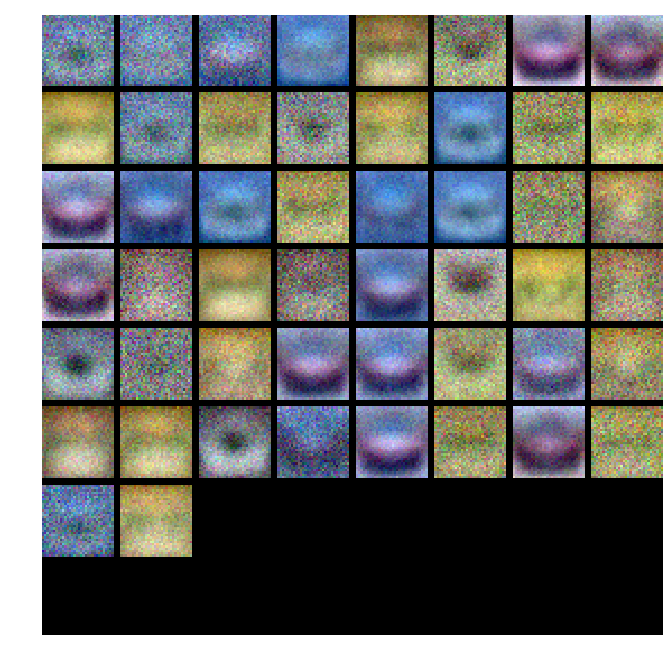

In [13]:
from cs231n.vis_utils import visualize_grid
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()
show_net_weights(net)

Tuning:
hidden layer size, learning rate, numer of training epochs, and regularization strength, (learning rate decay 0.95 is ok)

In [14]:
import numpy as np
import random
input_size = 32 * 32 * 3
num_classes = 10
best_net = None
best_params = {'hidden_size':50, 'num_iters':1000,
               'learning_rate':1e-4, 'reg':0.25, 
               'learning_rate_decay':0.95,}
best_params['hidden_size'] = 300   # 首先确定层数，使用默认参数只改变层数，发现当层数到达300以上时能到31%以上
best_val = 0.0
max_count = 50
for count in range(max_count):
    hidden_size = best_params['hidden_size']
    reg = 10 ** random.uniform(-3, -2)   # 其次确定reg和lr，逐渐缩小范围
#     lr = 10 ** random.uniform(-2, -3)
    lr = 0.002   # 发现lr在取0.002时val高，那么就固定lr，随机reg/layer
#     reg = 0.010556
    num_iters = 1000   # 然后确定参数以后，可以加大迭代次数
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
                     num_iters=num_iters, batch_size=1000,
                     learning_rate=lr, learning_rate_decay=0.95,
                     reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    print('no:%d layer:%d reg:%.8f lr:%f val_acc:%.8f ' % (count+1, hidden_size, reg, lr, val_acc))
    if best_val < val_acc:
        best_val = val_acc
        best_net = net
        best_params['hidden_size'] = hidden_size
        best_params['learning_rate'] = lr
        best_params['reg'] = reg
# no:11 layer:300 reg:0.016869 lr:0.002568 val_acc:0.511000 
# no:44 layer:300 reg:0.006800 lr:0.002087 val_acc:0.521000 
# no:29 layer:300 reg:0.010556 lr:0.002000 val_acc:0.540000 
# no:41 layer:300 reg:0.001256 lr:0.002000 val_acc:0.540000
# no:16 layer:300 reg:0.00124150 lr:0.002000 val_acc:0.54700000

no:1 layer:300 reg:0.00319720 lr:0.002000 val_acc:0.52900000 
no:2 layer:300 reg:0.00691568 lr:0.002000 val_acc:0.53800000 
no:3 layer:300 reg:0.00191198 lr:0.002000 val_acc:0.53100000 
no:4 layer:300 reg:0.00290281 lr:0.002000 val_acc:0.51500000 
no:5 layer:300 reg:0.00287108 lr:0.002000 val_acc:0.53000000 
no:6 layer:300 reg:0.00287512 lr:0.002000 val_acc:0.52900000 
no:7 layer:300 reg:0.00548927 lr:0.002000 val_acc:0.53500000 
no:8 layer:300 reg:0.00467891 lr:0.002000 val_acc:0.52700000 
no:9 layer:300 reg:0.00144660 lr:0.002000 val_acc:0.53100000 
no:10 layer:300 reg:0.00447540 lr:0.002000 val_acc:0.51900000 
no:11 layer:300 reg:0.00295456 lr:0.002000 val_acc:0.52900000 
no:12 layer:300 reg:0.00143262 lr:0.002000 val_acc:0.53000000 
no:13 layer:300 reg:0.00969439 lr:0.002000 val_acc:0.52900000 
no:14 layer:300 reg:0.00357288 lr:0.002000 val_acc:0.53000000 
no:15 layer:300 reg:0.00401634 lr:0.002000 val_acc:0.52200000 
no:16 layer:300 reg:0.00124150 lr:0.002000 val_acc:0.54700000 
n

{'reg': 0.001241504376788047, 'num_iters': 1000, 'learning_rate_decay': 0.95, 'learning_rate': 0.002, 'hidden_size': 300}


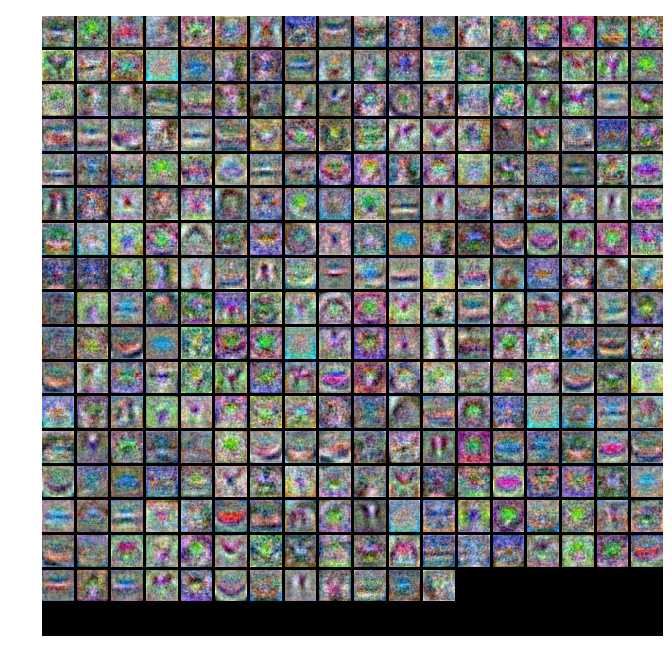

In [19]:
print(best_params)
show_net_weights(best_net)
# {'reg': 0.001241504376788047, 'num_iters': 1000, 'learning_rate_decay': 0.95, 'learning_rate': 0.002, 'hidden_size': 300}

In [20]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuacy: ', test_acc)

Test accuacy:  0.532
